In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)



In [3]:
# Load the training dataset
train_data = pd.read_csv('../archive/sign_mnist_train.csv')


In [4]:
# Separate the data (features) and the classes
X_train = train_data.drop(["label"], axis=1)  # Features (all columns except the first one)
X_train = X_train / 255.0
y_train = train_data['label']   # Target (first column)

# Create validation dataset by splitting training data (20% for validation)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [5]:
# Experiment with different learning rates and fix the hidden layer size
# Record the validation accuracies and F1-scores for each learning rate
# tqdm for progress bar
learning_rates = [1e-5,1e-4, 0.0005, 0.001, 0.01, 0.1]
val_accs = []
f1_scores = []
for i,lr in enumerate(learning_rates):
    for hd in [64, 128, 256]:
        model = MLPClassifier(
            hidden_layer_sizes=(hd,),
            learning_rate_init=lr,
            max_iter=200,
            random_state=42,
            # verbose=True
        )
        model.fit(X_train, y_train)
        val_acc = model.score(X_validate, y_validate)
        f1_score_val = f1_score(y_validate, model.predict(X_validate), average='weighted')
        f1_scores.append(f1_score_val)
        val_accs.append(val_acc)
        print(f'Learning Rate: {lr}|  Hidden Size: {hd}|  Validation Accuracy: {val_acc:.4f}| F1-Score: {f1_score_val:.4f}')
    print('----------------------------------')
    # model.fit(X_train, y_train)
    # val_acc = model.score(X_validate, y_validate)
    # f1_score_val = f1_score(y_validate, model.predict(X_validate), average='weighted')
    # f1_scores.append(f1_score_val)
    # val_accs.append(val_acc)
    # print(f'{i+1}. Learning Rate: {lr}| Validation Accuracy: {val_acc:.4f}| F1-Score: {f1_score_val:.4f}')


Learning Rate: 1e-05|  Hidden Size: 64|  Validation Accuracy: 0.6580| F1-Score: 0.6534
Learning Rate: 1e-05|  Hidden Size: 128|  Validation Accuracy: 0.7430| F1-Score: 0.7420
Learning Rate: 1e-05|  Hidden Size: 256|  Validation Accuracy: 0.8062| F1-Score: 0.8053
----------------------------------
Learning Rate: 0.0001|  Hidden Size: 64|  Validation Accuracy: 0.9867| F1-Score: 0.9867
Learning Rate: 0.0001|  Hidden Size: 128|  Validation Accuracy: 0.9998| F1-Score: 0.9998
Learning Rate: 0.0001|  Hidden Size: 256|  Validation Accuracy: 0.9998| F1-Score: 0.9998
----------------------------------
Learning Rate: 0.0005|  Hidden Size: 64|  Validation Accuracy: 0.9998| F1-Score: 0.9998
Learning Rate: 0.0005|  Hidden Size: 128|  Validation Accuracy: 1.0000| F1-Score: 1.0000
Learning Rate: 0.0005|  Hidden Size: 256|  Validation Accuracy: 1.0000| F1-Score: 1.0000
----------------------------------
Learning Rate: 0.001|  Hidden Size: 64|  Validation Accuracy: 1.0000| F1-Score: 1.0000
Learning Rate

In [16]:
val_accs = [0.6580,0.7430,0.8062 ,
            0.9867, 0.9998, 0.9998,
            0.9998, 1.0000, 1.0000,
            1.0000, 1.0000, 1.0000, 
            0.6190, 0.3999, 0.5904,
            0.0399, 0.0399, 0.0530
            ]
f1_scores = [0.6534,0.7420,0.8053,
            0.9867, 0.9998, 0.9998,
             0.9998, 1.0000, 1.0000,
             1.0000, 1.0000, 1.0000,
             0.6144, 0.3779, 0.5921,
             0.0031, 0.0031, 0.0053
            ]
# print only the validation accuracies for hidden size 64
print("Validation Accuracies for Hidden Size 64:")
print(val_accs[::3])
print(val_accs[1::3])
# print(val_accs[:1:3])

Validation Accuracies for Hidden Size 64:
[0.658, 0.9867, 0.9998, 1.0, 0.619, 0.0399]
[0.743, 0.9998, 1.0, 1.0, 0.3999, 0.0399]


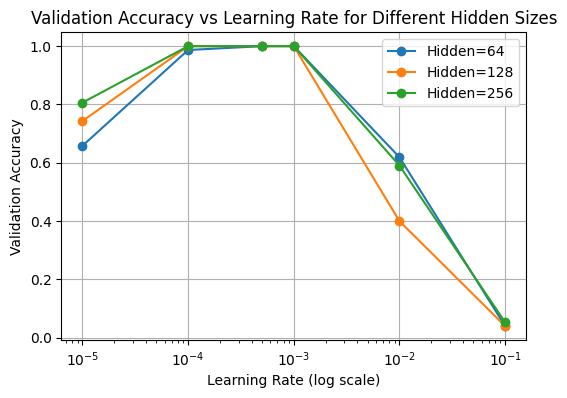

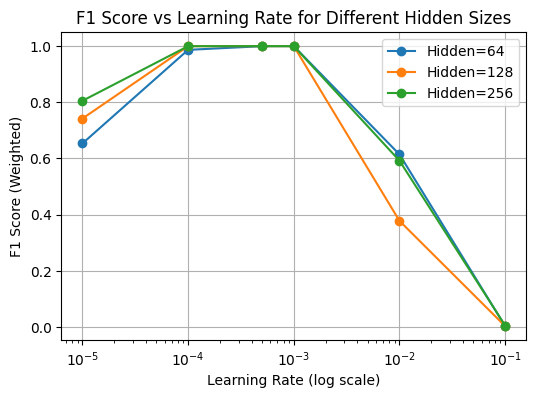

In [21]:
from collections import defaultdict
from matplotlib import pyplot as plt
# -------------------------
# Plot Validation Accuracy
# -------------------------
learning_rates = [1e-5,1e-4, 0.0005, 0.001, 0.01, 0.1]

plt.figure(figsize=(6,4))
plt.plot(learning_rates, val_accs[::3], marker='o', label=f"Hidden={64}")
plt.plot(learning_rates, val_accs[1::3], marker='o', label=f"Hidden={128}")
plt.plot(learning_rates, val_accs[2::3], marker='o', label=f"Hidden={256}")


plt.xscale("log")
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Learning Rate for Different Hidden Sizes")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------
# Plot F1 Score
# -------------------------
plt.figure(figsize=(6,4))
plt.plot(learning_rates, f1_scores[::3], marker='o', label=f"Hidden={64}")
plt.plot(learning_rates, f1_scores[1::3], marker='o', label=f"Hidden={128}")
plt.plot(learning_rates, f1_scores[2::3], marker='o', label=f"Hidden={256}")

plt.xscale("log")
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("F1 Score (Weighted)")
plt.title("F1 Score vs Learning Rate for Different Hidden Sizes")
plt.grid(True)
plt.legend()
plt.show()
